In [195]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [156]:
pho = pd.read_csv("phoneme.csv")

In [157]:
pho.head(n=10)

,Aa,Ao,Dcl,Iy,Sh,class
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0
5,0.960,0.712,-0.143,0.091,-0.061,0
6,2.941,0.657,1.493,-0.331,-0.123,0
7,0.401,1.159,2.064,-0.690,-0.308,0
8,0.229,1.748,0.634,0.259,0.000,0
9,0.303,0.609,0.474,1.427,-0.811,1


In [158]:
pho.describe()

,Aa,Ao,Dcl,Iy,Sh,class
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.818957,1.258802,0.764732,0.398743,0.078619,0.293486
std,0.858733,0.851057,0.925436,0.796531,0.575624,0.455401
min,-1.700000,-1.327000,-1.823000,-1.581000,-1.284000,0.000000
25%,0.243750,0.596000,-0.115000,-0.205000,-0.232250,0.000000
50%,0.492500,1.075500,0.729000,0.285500,-0.044000,0.000000
75%,1.089250,1.866250,1.484000,0.937000,0.196250,1.000000
max,4.107000,4.378000,3.199000,2.826000,2.719000,1.000000


In [159]:
X = pho[pho.columns[:-1]] # 属性の最初から最後の手前までを抽出 [Aa ~ Sh]
y = pho[pho.columns[-1]] # 属性の最後を抽出 [class]

X = np.array(X)
y = np.array(y)

In [160]:
print(pho.shape)
print(X)

(5404, 6)
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]


In [161]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = SVC(C=10,gamma=10,kernel='poly')
clf.fit(X_train, y_train) 

In [ ]:
# predict label
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

In [190]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       767
           1       0.64      0.57      0.60       314

   micro avg       0.78      0.78      0.78      1081
   macro avg       0.74      0.72      0.73      1081
weighted avg       0.78      0.78      0.78      1081



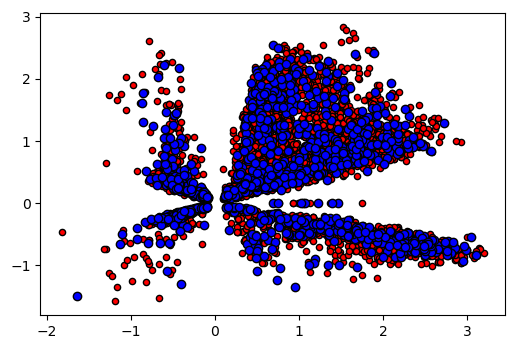

In [191]:
# 散布図のプロットは実行できました
# 確認のため書きますが、このグラフはX[:, 0] (Aa)とX[:, 1] (Ao)のプロットです
plt.figure(dpi=100)
plt.scatter(X[:,2], X[:,3],  c='red', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.scatter(X_test[:,2], X_test[:,3], c='blue', facecolors='none', zorder=10, edgecolor='k')

In [192]:
svc = SVC()
# 交差検証
scores = cross_val_score(svc, X, y, cv=5)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

C:\Users\Owner\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Cross-Validation scores: [0.82347505 0.84551341 0.82516189 0.83888889 0.82962963]
Average score: 0.8325337730753576


In [193]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([pho.columns[:-1], odds], index=['features', 'odds']).T

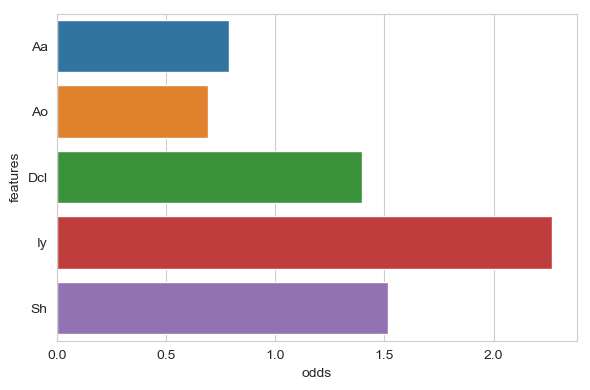

In [196]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()